In [1]:
using DifferentialEquations

In [2]:
f(u,p,t) = 0.98u
u0 = 1.0
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

In [3]:
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 5-element Array{Float64,1}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436028208104
 1.0
u: 5-element Array{Float64,1}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384275622996
 2.664456142481451

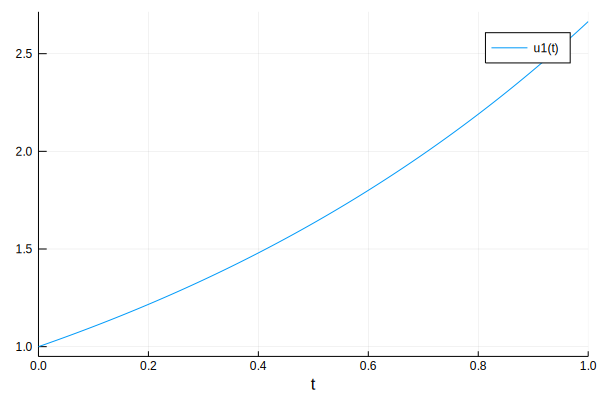

In [8]:
using Plots; gr()
plot(sol)

In [5]:
plot(sol,linewidth=5,title="Solution to the lniear ODE with a thik line",xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!")

LoadError: UndefVarError: plot not defined

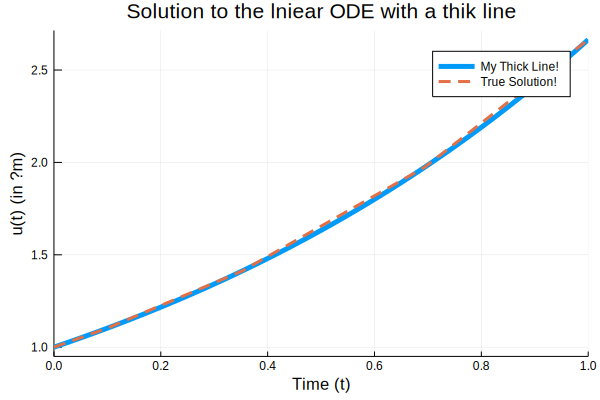

In [10]:
plot!(sol.t,t->1.0*exp(0.98t),lw=3,ls=:dash,label="True Solution!")

In [11]:
sol(0.35)

1.4091687598032554

In [12]:
sol = solve(prob,abstol=1e-8,reltol=1e-8)

retcode: Success
Interpolation: automatic order switching interpolation
t: 9-element Array{Float64,1}:
 0.0
 0.04127492324135852
 0.14679917846877366
 0.28631546412766684
 0.4381941361169628
 0.6118924302028597
 0.7985659100883337
 0.9993516479536952
 1.0
u: 9-element Array{Float64,1}:
 1.0
 1.0412786454705882
 1.1547261252949712
 1.3239095703537043
 1.5363819257509728
 1.8214895157178692
 2.1871396448296223
 2.662763824115295
 2.664456241933517

In [14]:
function lorenz!(du,u,p,t)
    σ,ρ,β=p
    du[1] = σ*(u[2] - u[1])
    du[2] = u[1]*(ρ - u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

lorenz! (generic function with 1 method)

In [15]:
u0 = [1.0,0.0,0.0]

3-element Array{Float64,1}:
 1.0
 0.0
 0.0

In [16]:
p = (10,28,8/3)

(10, 28, 2.6666666666666665)

In [17]:
tspan = (0.0,100.0)

(0.0, 100.0)

In [18]:
prob = ODEProblem(lorenz!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [1.0, 0.0, 0.0]

In [19]:
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 1294-element Array{Float64,1}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072
   0.01695646895607931
   0.0276899566248403
   0.041856345938267966
   0.06024040228733675
   0.08368539694547242
   0.11336497050342806
   0.14862178548871152
   0.18703974465019643
   ⋮
  99.15166031662457
  99.22514723290307
  99.31227549560941
  99.39403070915297
  99.47001147494375
  99.54379656909015
  99.614651558349
  99.69093823148101
  99.78733023233721
  99.86114450046736
  99.96115759510786
 100.0
u: 1294-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.0010461623302512404]
 [0.8800455868998046, 0.43873645009348244, 0.0034

In [20]:
A = convert(Array,sol)

3×1294 Array{Float64,2}:
 1.0  0.999643     0.996105    0.969359     …   4.52712   8.04367   9.97538
 0.0  0.000998805  0.0109654   0.0897706        6.89588  12.7116   15.1439
 0.0  1.78143e-8   2.14696e-6  0.000143802     16.5854   18.1254   21.0064

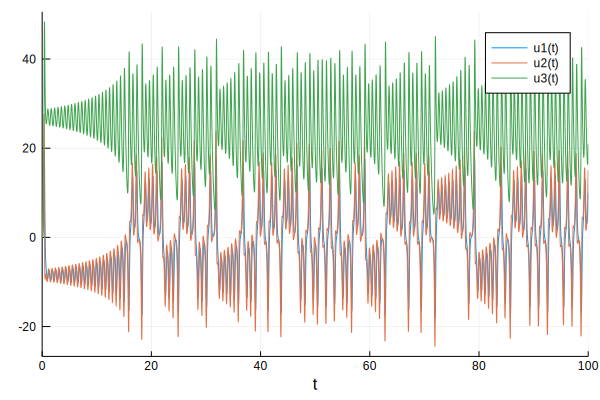

In [21]:
plot(sol)

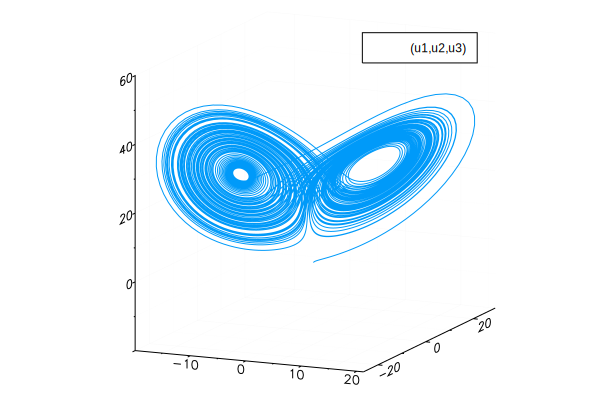

In [22]:
plot(sol,vars=(1,2,3))

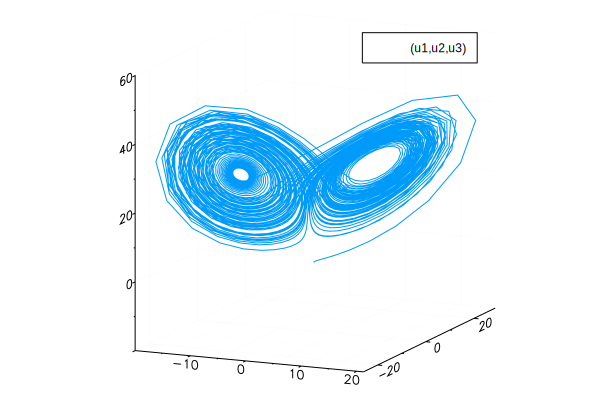

In [28]:
plot(sol,vars=(1,2,3),denseplot=true,plotdensity=3000)

In [38]:
A = [1. 0 0 -5
    4 -2 4 -3
    -4 0 0 1
    5 -2 2 3]

4×4 Array{Float64,2}:
  1.0   0.0  0.0  -5.0
  4.0  -2.0  4.0  -3.0
 -4.0   0.0  0.0   1.0
  5.0  -2.0  2.0   3.0

In [40]:
u0 = rand(4,2)
tspan = (0.0,1.0)
f(u,p,t) = A*u
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 12-element Array{Float64,1}:
 0.0
 0.028843188490436482
 0.07012962413392435
 0.11227461093276464
 0.1854303803390055
 0.2733091988486776
 0.38851830578880514
 0.5221775507175892
 0.6613086301279049
 0.7721727828794601
 0.9450466168158429
 1.0
u: 12-element Array{Array{Float64,2},1}:
 [0.4315168386847843 0.3833532478094448; 0.7683379523183822 0.4428476473619509; 0.5589024146019874 0.011088525796868698; 0.2673715398994436 0.7641559825629713]
 [0.3997533380340419 0.27585305808421523; 0.8067802173348868 0.3870597119929536; 0.5195966923445043 -0.003689556182105449; 0.3392840659927966 0.8582306569365099]
 [0.33478399852442886 0.09330791396209165; 0.8335693721120095 0.27571869657147785; 0.47467249582007753 0.003424941224103175; 0.43661960960514984 0.9832156093010744]
 [0.24533385951359937 -0.12669160461138218; 0.8287799550240587 0.12835999222193611; 0.44580309144602304 0.04965523298064658; 0.5275810556201902 1.0966221

In [32]:
sol[3]

4×2 Array{Float64,2}:
 -0.126509  0.763908
  0.18853   0.524322
  0.63073   0.118728
  1.06152   0.782649

In [56]:
# Solving a ODE problem 
# y' = A*y + b


A = [1 0 3
    4 0 0
    0 0 -1]
tspan = (0.0,5.0)
b(t) = [5*cos(t) - 5*sin(t) - 12*cos(3*t); -3*sin(t) + 6*cos(t) - 20*sin(t);-12*sin(3*t) + 4*cos(3*t)]
f(u,p,t) = A*u + b(t)
exact_solution(t) = [5*sin(t);3*cos(t) + 6*sin(t); 4*cos(3*t)]
u0 = [0;3;4]
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Array{Int64,1} and tType Float64. In-place: false
timespan: (0.0, 5.0)
u0: [0, 3, 4]

In [69]:
sol = solve(prob,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 22-element Array{Float64,1}:
 0.0
 0.00028276021886791897
 0.0031103624075471087
 0.027830445980571394
 0.09173472902402457
 0.19241059113964776
 0.322321025828737
 0.49690367866134527
 0.7070839524682023
 0.9352190670237986
 1.1986856466726714
 1.4940398600934888
 1.8508056141886746
 2.160799779470253
 2.5110541415438457
 2.9169436962423245
 3.215633149875468
 3.566561130640256
 3.9620907440602586
 4.325065468241426
 4.716473668623203
 5.0
u: 22-element Array{Array{Float64,1},1}:
 [0.0, 3.0, 4.0]
 [0.0014138010754999066, 3.0016964413605884, 3.9999985608399418]
 [0.01555178696212438, 3.0186476328347887, 3.9998258628859906]
 [0.13913426758261604, 3.1657993954761747, 3.986066489778699]
 [0.45803060586965494, 3.5370226787855064, 3.8494789245865406]
 [0.9561277647550785, 4.091991565220619, 3.351905988296782]
 [1.5838444694734375, 4.746121011454994, 2.271208139111212]
 [2.3835290479895637, 5.49742025725135, 0.3199

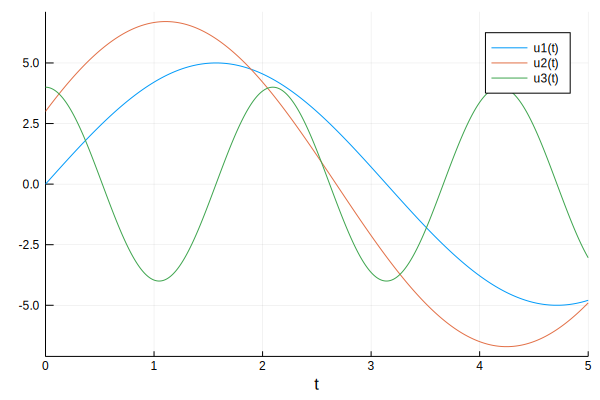

In [70]:
using Plots
plot(sol)

In [71]:
exact_sol = exact_solution.(sol.t)

22-element Array{Array{Float64,1},1}:
 [0.0, 3.0, 4.0]
 [0.001413801075499908, 3.0016964413605884, 3.9999985608399418]
 [0.015551786962124378, 3.018647632834789, 3.9998258628859906]
 [0.13913426758269942, 3.165799395499898, 3.986066489779427]
 [0.45803060604477297, 3.537022686083529, 3.849478924766986]
 [0.956127773338247, 4.091991690382242, 3.3519059898765264]
 [1.5838445562545853, 4.746121701860865, 2.2712081378228275]
 [2.383529835797073, 5.497424227751247, 0.3199988468167877]
 [3.2480979175050226, 6.178495782774737, -2.0923021028065176]
 [4.023645724198856, 6.609301322042527, -3.77640939406546]
 [4.657810074619663, 6.680119498964202, -3.593985300790254]
 [4.98527834196682, 6.212377369581784, -0.9129592843496527]
 [4.805264358227959, 4.937223507116071, 2.9786468666084427]
 [4.154693790806087, 3.316540873333686, 3.9208896919918454]
 [2.947899025216704, 1.1143484414106313, 1.2613763099954571]
 [1.1138207704147631, -1.5880321760645713, -3.1254584596522657]
 [-0.3698643327638851, -3.435

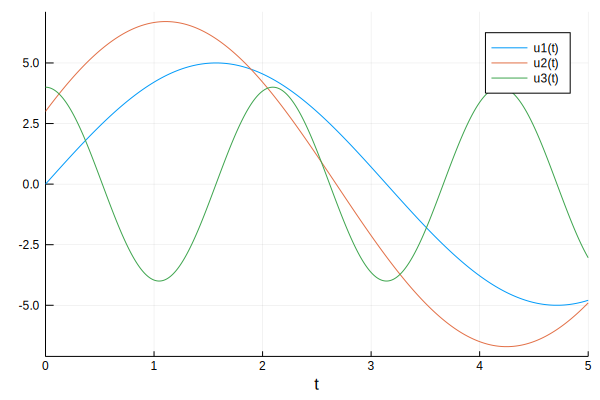

In [67]:
plot(sol)

In [64]:
exact_sol = hcat(exact_sol...)

3×22 Array{Float64,2}:
 0.0  0.0014138  0.0155518  0.139134  …  -4.62962  -4.99996   -4.79462
 3.0  3.0017     3.01865    3.1658       -6.68867  -5.9877    -4.90256
 4.0  4.0        3.99983    3.98607       3.67035  -0.049015  -3.03875

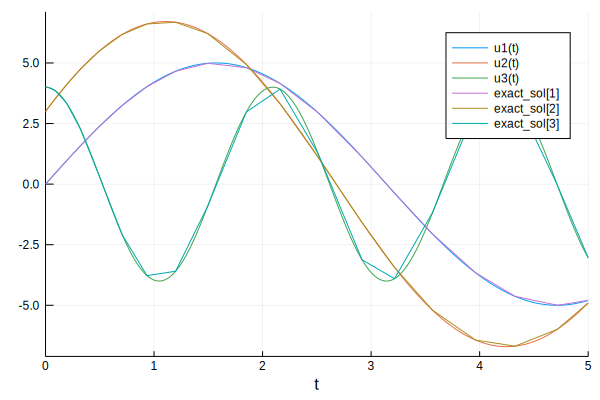

In [68]:
plot!(sol.t,exact_sol[1,:],label="exact_sol[1]")
plot!(sol.t,exact_sol[2,:],label="exact_sol[2]")
plot!(sol.t,exact_sol[3,:],label="exact_sol[3]")